# Battery life predection (polynomial regression)

## Overview 

- [Problem Discription](https://www.hackerrank.com/challenges/battery/problem)

## Setup

- Installing scikit-learn package

```
conda install scikit-learn

```

In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

## Data Loading

- [Dataset Source](https://www.hackerrank.com/challenges/battery/problem)

In [2]:
data = pd.read_csv("dataset.csv",sep=',')

## Data Exploration

#### exploring data by plotting

Text(0,0.5,'Battery Last For')

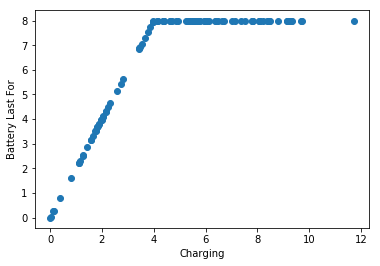

In [3]:
from matplotlib import pyplot as plt
plt.scatter(data.chargingTime, data.estimatedLifeTime)
plt.xlabel("Charging")
plt.ylabel("Battery Last For")

After plotting data we observe a trick, when charging battery for more than 4 hours the estimated life for battery stills 8 hours that depends on battey capacity not on charging time 

#### Data Cleaning

below is removing the noisey data by ignoring the samples which have +8.0 estimated life time

In [4]:
X_filtered = []
y_filtered = []
for i in range(len(data)):
    sample=data.iloc[i]
    if (sample['estimatedLifeTime'] >= 8.0):
        continue
    else:
        X_filtered.append(sample['chargingTime'])
        y_filtered.append(sample['estimatedLifeTime'])

In [5]:
filterdDF = pd.DataFrame({0: X_filtered, 1: y_filtered})

plotting data after cleaning

Text(0,0.5,'Battery Last For')

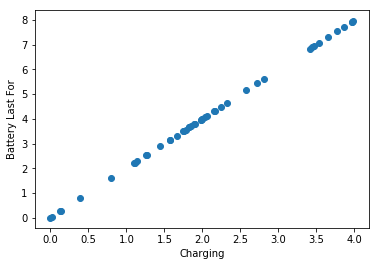

In [6]:
from matplotlib import pyplot as plt
plt.scatter(X_filtered, y_filtered)
plt.xlabel("Charging")
plt.ylabel("Battery Last For")

### Splitting Dataset

splitting dataset into training and testing with (80% , 20%)

In [7]:
features_train, features_test, battery_train, battery_test = train_test_split(filterdDF[0], filterdDF[1], test_size=0.2)

### Model Training

define linear regression model and fit it with training data

In [8]:
lm = linear_model.LinearRegression()
model = lm.fit(features_train.values.reshape(-1, 1), battery_train)

In [9]:
print("model score")
print(model.score(features_test.values.reshape(-1, 1), battery_test))

model score
1.0
